In [10]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [8]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']
df =pd.read_csv("C:\\Users\\APARNA\\Documents\\bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


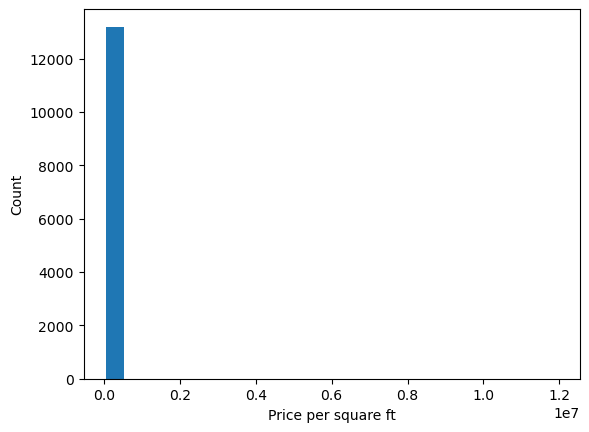

In [16]:
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [ ]:
#as you can see dataset has some bad outliers


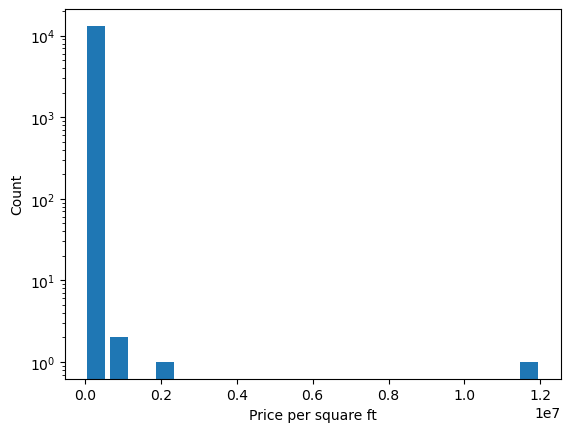

In [18]:
plt.hist(df.price_per_sqft, bins=20,rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [ ]:
#you can see atleast few bars on right hand side of our highest building

In [20]:
lower_limit, upper_limit=df.price_per_sqft.quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [22]:
outliers=df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5343,other,9 BHK,42000.0,8.0,175.0,9,416
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
12355,other,4 BHK,16335.0,4.0,149.0,4,912
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [ ]:
#we have remove value such as 500 per sqft which is very low for the city bangalore.

In [24]:
df2 =df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [26]:
df.shape[0]- df2.shape[0]

28

In [ ]:
#We remoed total 28 outliers

In [35]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [49]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500
1281,Chamrajpet,9 Bedroom,4050.0,7.0,1200.0,9,29629
9853,Indira Nagar,5 Bedroom,2400.0,5.0,700.0,5,29166
3605,other,4 Bedroom,2700.0,6.0,675.0,4,25000
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041
12352,other,6 Bedroom,2400.0,5.0,750.0,6,31250
6134,Basavangudi,6 Bedroom,1754.0,6.0,650.0,6,37058
3675,Kasturi Nagar,5 Bedroom,1650.0,5.0,450.0,5,27272
9419,HSR Layout,9 Bedroom,1200.0,9.0,350.0,9,29166
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260


In [51]:
df3=df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [53]:
df2.shape[0]-df3.shape[0]

125

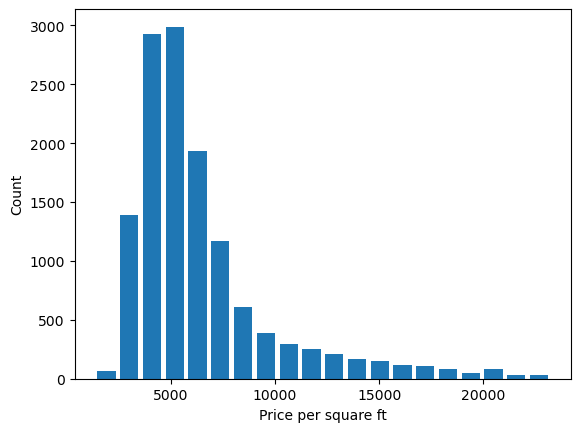

In [57]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()